In [91]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import glob
import DominantColor

image_list=[]
image_list_col =[]



def printSigns(image_list, is_grey):
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(40)
    
    col_number = 3
    row_number = 7
    num = 1
    
    for img in image_list:
        plt.subplot(row_number,col_number,num)
        if is_grey:
            plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
        else:
            plt.imshow(img)
        num += 1
        
printSigns(image_list, False)



    

<Figure size 4000x4000 with 0 Axes>

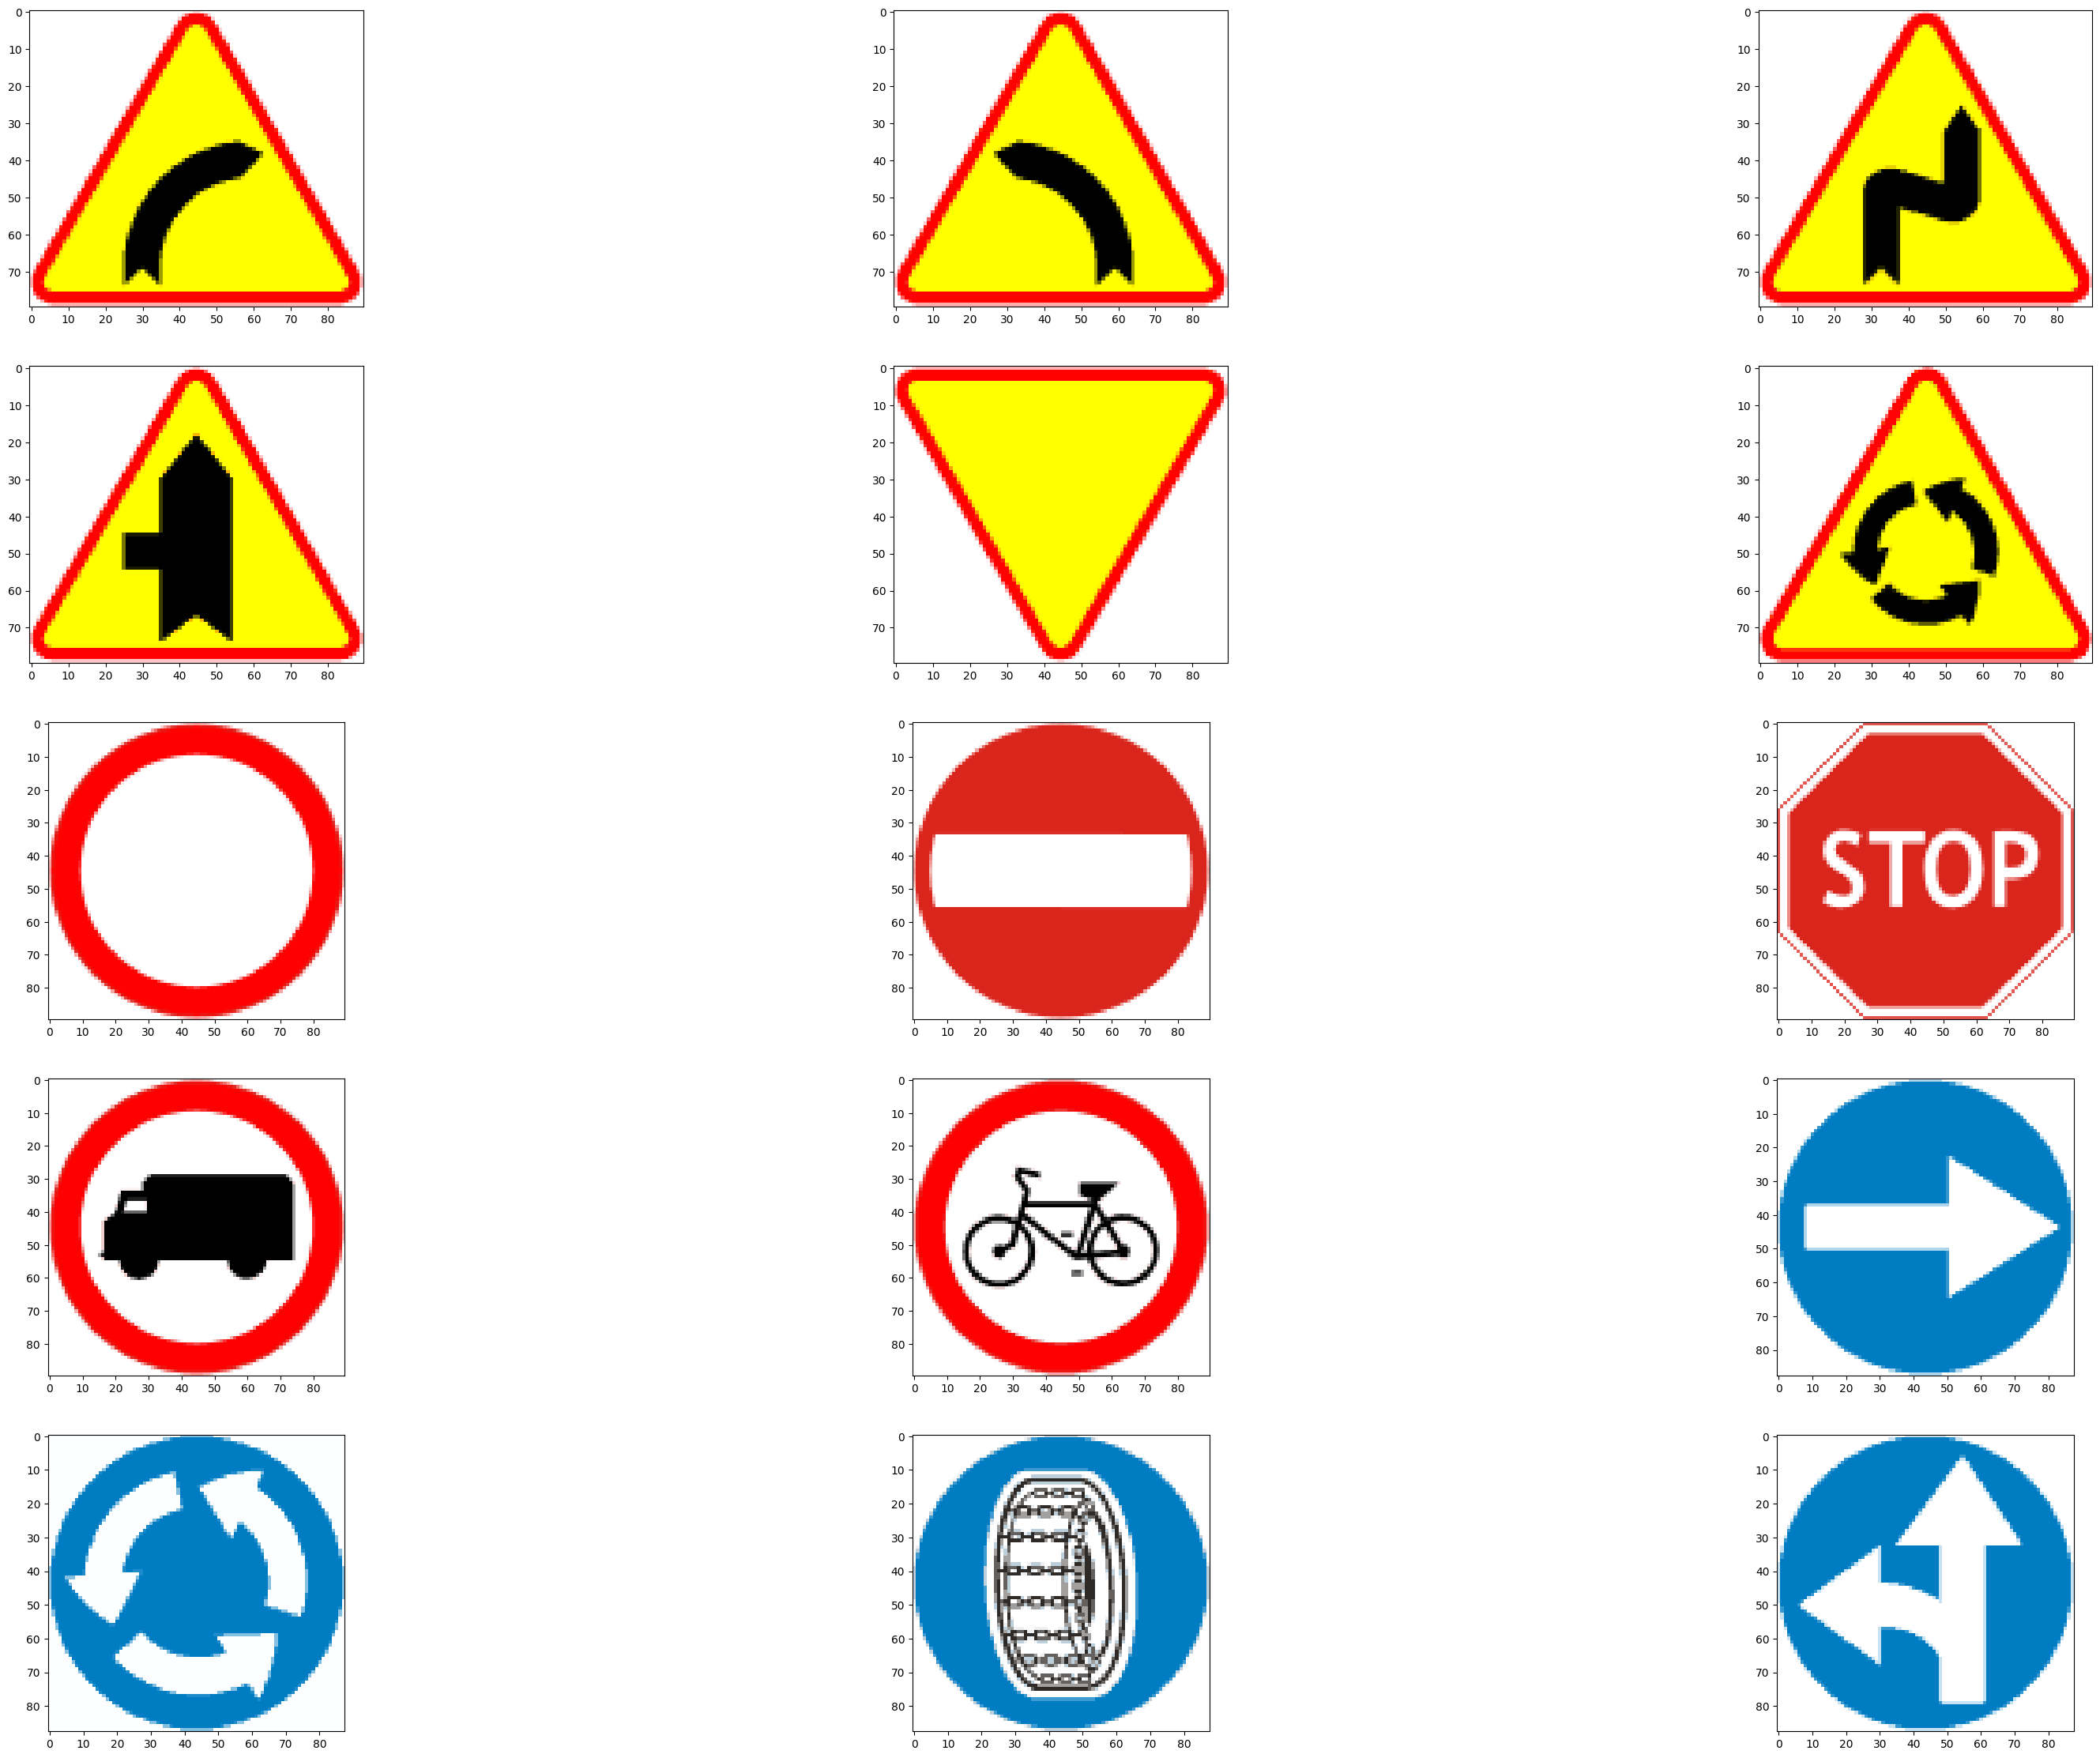

In [92]:


extensions = ("*.png","*.jpg","*.jpeg",)
glob_list = []
for extension in extensions:
    glob_list.extend(glob.glob("../../znaki-sandbox/znaki/"+extension))


for filename in glob_list:
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    image_list.append(im)
    
printSigns(image_list, False)

In [93]:
import itertools
b = [0, 0, 0]
c = [0, 0, 10]


def dopasowanieKoloru(b, col):
    # print(col)
    dh = (1-min(abs(col[0]-b[0]), 255-abs(col[0]-b[0]))/255)**3
    ds = (1-abs(col[1]-b[1]) /255)
    dv = (1-abs(col[2]-b[2]) / 255.0 )   
    return (dh*ds*dv)
def checkWhite(col):    
    return abs(255-col[1]) / 255.0   


    return 1-dh
class estymarotZnaku:
    def __init__(self):
        # self.i = 0 ;
        pass
        
    def est(self, arr):            

        return [self.checkA(arr),          
        self.checkB(arr) ,          
        self.checkC(arr)]
    
    def checkA(self,col):
        yelow = [ 40,   253,   252]
        red = [  250,   253,     253]
        yd = 0
        bd = 0
        rd = 0
        for i in col:
            yd= max(yd,dopasowanieKoloru(yelow, i))
            rd= max(rd,dopasowanieKoloru(red, i))
            bd= max(bd,1-checkWhite( i))
        return yd*.5+rd*.4 +bd*.1
    
    def checkB(self,col):
        red = [ 250,   253,   252]
        yd = 0
        bd = 0
        rd = 0
        for i in  col:
            yd= max(yd,dopasowanieKoloru(red, i))
            # rd= max(rd,checkWhite( i))
            bd= max(bd,1-checkWhite( i))
        return yd*.9 +bd*.1#+rd*.4
    
    def checkC(self,col):
        blue = [ 100,   230,   252]
        yd = 0
        rd = 0
        for i in  col:
            yd= max(yd,dopasowanieKoloru(blue, i))
            # rd= max(rd,checkWhite( i))
        return yd#*.5+rd*.4 

    # def get_A(self):
    #     B =[[0,   0,   0],
    #           [0,   0, 0],
    #           [0,   0, 0]]
    #     for k in range(3):
    #         for j in range(3):
    #             B[k][j] = self.A[k][j]/self.i
    #     return B
est = estymarotZnaku()

print(est.est([[-1.42108547e-14 , 2.84217094e-14, -1.42108547e-13],
 [ 3.55271368e-14,  3.60946372e+00,  2.55000000e+02],
 [ 2.30852843e+01,  2.53426421e+02,  2.52386288e+02]]))
#black read white 


print(est.est([[0,   0,   0],
               [230,   170, 255],
               [255,   200, 200]]))

print(est.est([[0,   0,   0],
               [0,   0,   120],
               [160,   200, 200]]))

print(est.est([[0,   0,   120],
               ]))


[0.7857501762970783, 0.7315395560524849, 0.30885454448922844]
[0.5039459701458198, 0.6132530978145712, 0.15775122789491144]
[0.19321832049909876, 0.23219047927596462, 0.31410980119828963]
[0.0025481452080734716, 0.003208460820741482, 0.010620361812301096]


In [94]:
def compareFn(a, b)->int:
    if a[0]==b[0]:
        if a[1]==b[1]:
            if a[2]==b[2]:
                return 0
            else:
                return a[2]-b[2]
        else:
            return a[1]-b[1]
    else:
        return a[0]-b[0]
    
def sortCol(arr):
    if compareFn(arr[0], arr[1])>0:
        tmp = arr[0].copy()
        arr[0] = arr[1]
        arr[1] = tmp
    if compareFn(arr[1], arr[2])>0:
        tmp= arr[1].copy()
        arr[1]= arr[2]
        arr[2]= tmp
    if compareFn(arr[0], arr[1])>0:
        tmp = arr[0].copy()
        arr[0]= arr[1]
        arr[1]= tmp
        
# col = [[  0, 106 ,255],[  0 ,  0 ,254], [  0,   0 ,  0] ]
# col2 = [[255, 251, 251], [253 ,251,   0], [164,  10,   4]]
# sort(col)
# print(col)
# sort(col2)
# print(col2)

In [95]:


for img, filename in itertools.zip_longest(image_list ,glob_list) :
    dc = DominantColor.DominantColors(img)
    dmc = dc.dominantColors();# RGB
    dc.printCol(image_list_col)
    # dmc = cv2.cvtColor(dmc, cv2.COLOR_HSV2LAB)        
    sortCol(dmc)
    # print(dmc)    
    
    print(filename, end= "  ")    
    print(est.est(dmc))
    # if est.est(dmc)< .9:
    #     print(dmc )
    
    
# est.get_A()
    
    

../../znaki-sandbox/znaki\A-1.png  [0.7857501755214567, 0.7315395562956171, 0.3088545443046886]
../../znaki-sandbox/znaki\A-2.png  [0.7857273015000648, 0.7315966177428974, 0.3088058036231856]
../../znaki-sandbox/znaki\A-3.png  [0.7764113881681911, 0.7257553072316639, 0.3040914437262167]
../../znaki-sandbox/znaki\A-6c.png  [0.7752938069522556, 0.7328169685472884, 0.2998327966720885]
../../znaki-sandbox/znaki\A-7.png  [0.7796132054313546, 0.7159069559479994, 0.3094394365827031]
../../znaki-sandbox/znaki\A-8.png  [0.7806214541817876, 0.7275906753568726, 0.3068758878520212]
../../znaki-sandbox/znaki\B-1.png  [0.7645370819358438, 0.9334749567758118, 0.20734897410704664]
../../znaki-sandbox/znaki\B-2.png  [0.5961935815816242, 0.7196203817242478, 0.19092563872350862]
../../znaki-sandbox/znaki\B-20.png  [0.5970329935210211, 0.7206315234595374, 0.19116420089686087]
../../znaki-sandbox/znaki\B-5.png  [0.7574901708603807, 0.9253044702693265, 0.20924084763516784]
../../znaki-sandbox/znaki\B-9.png 

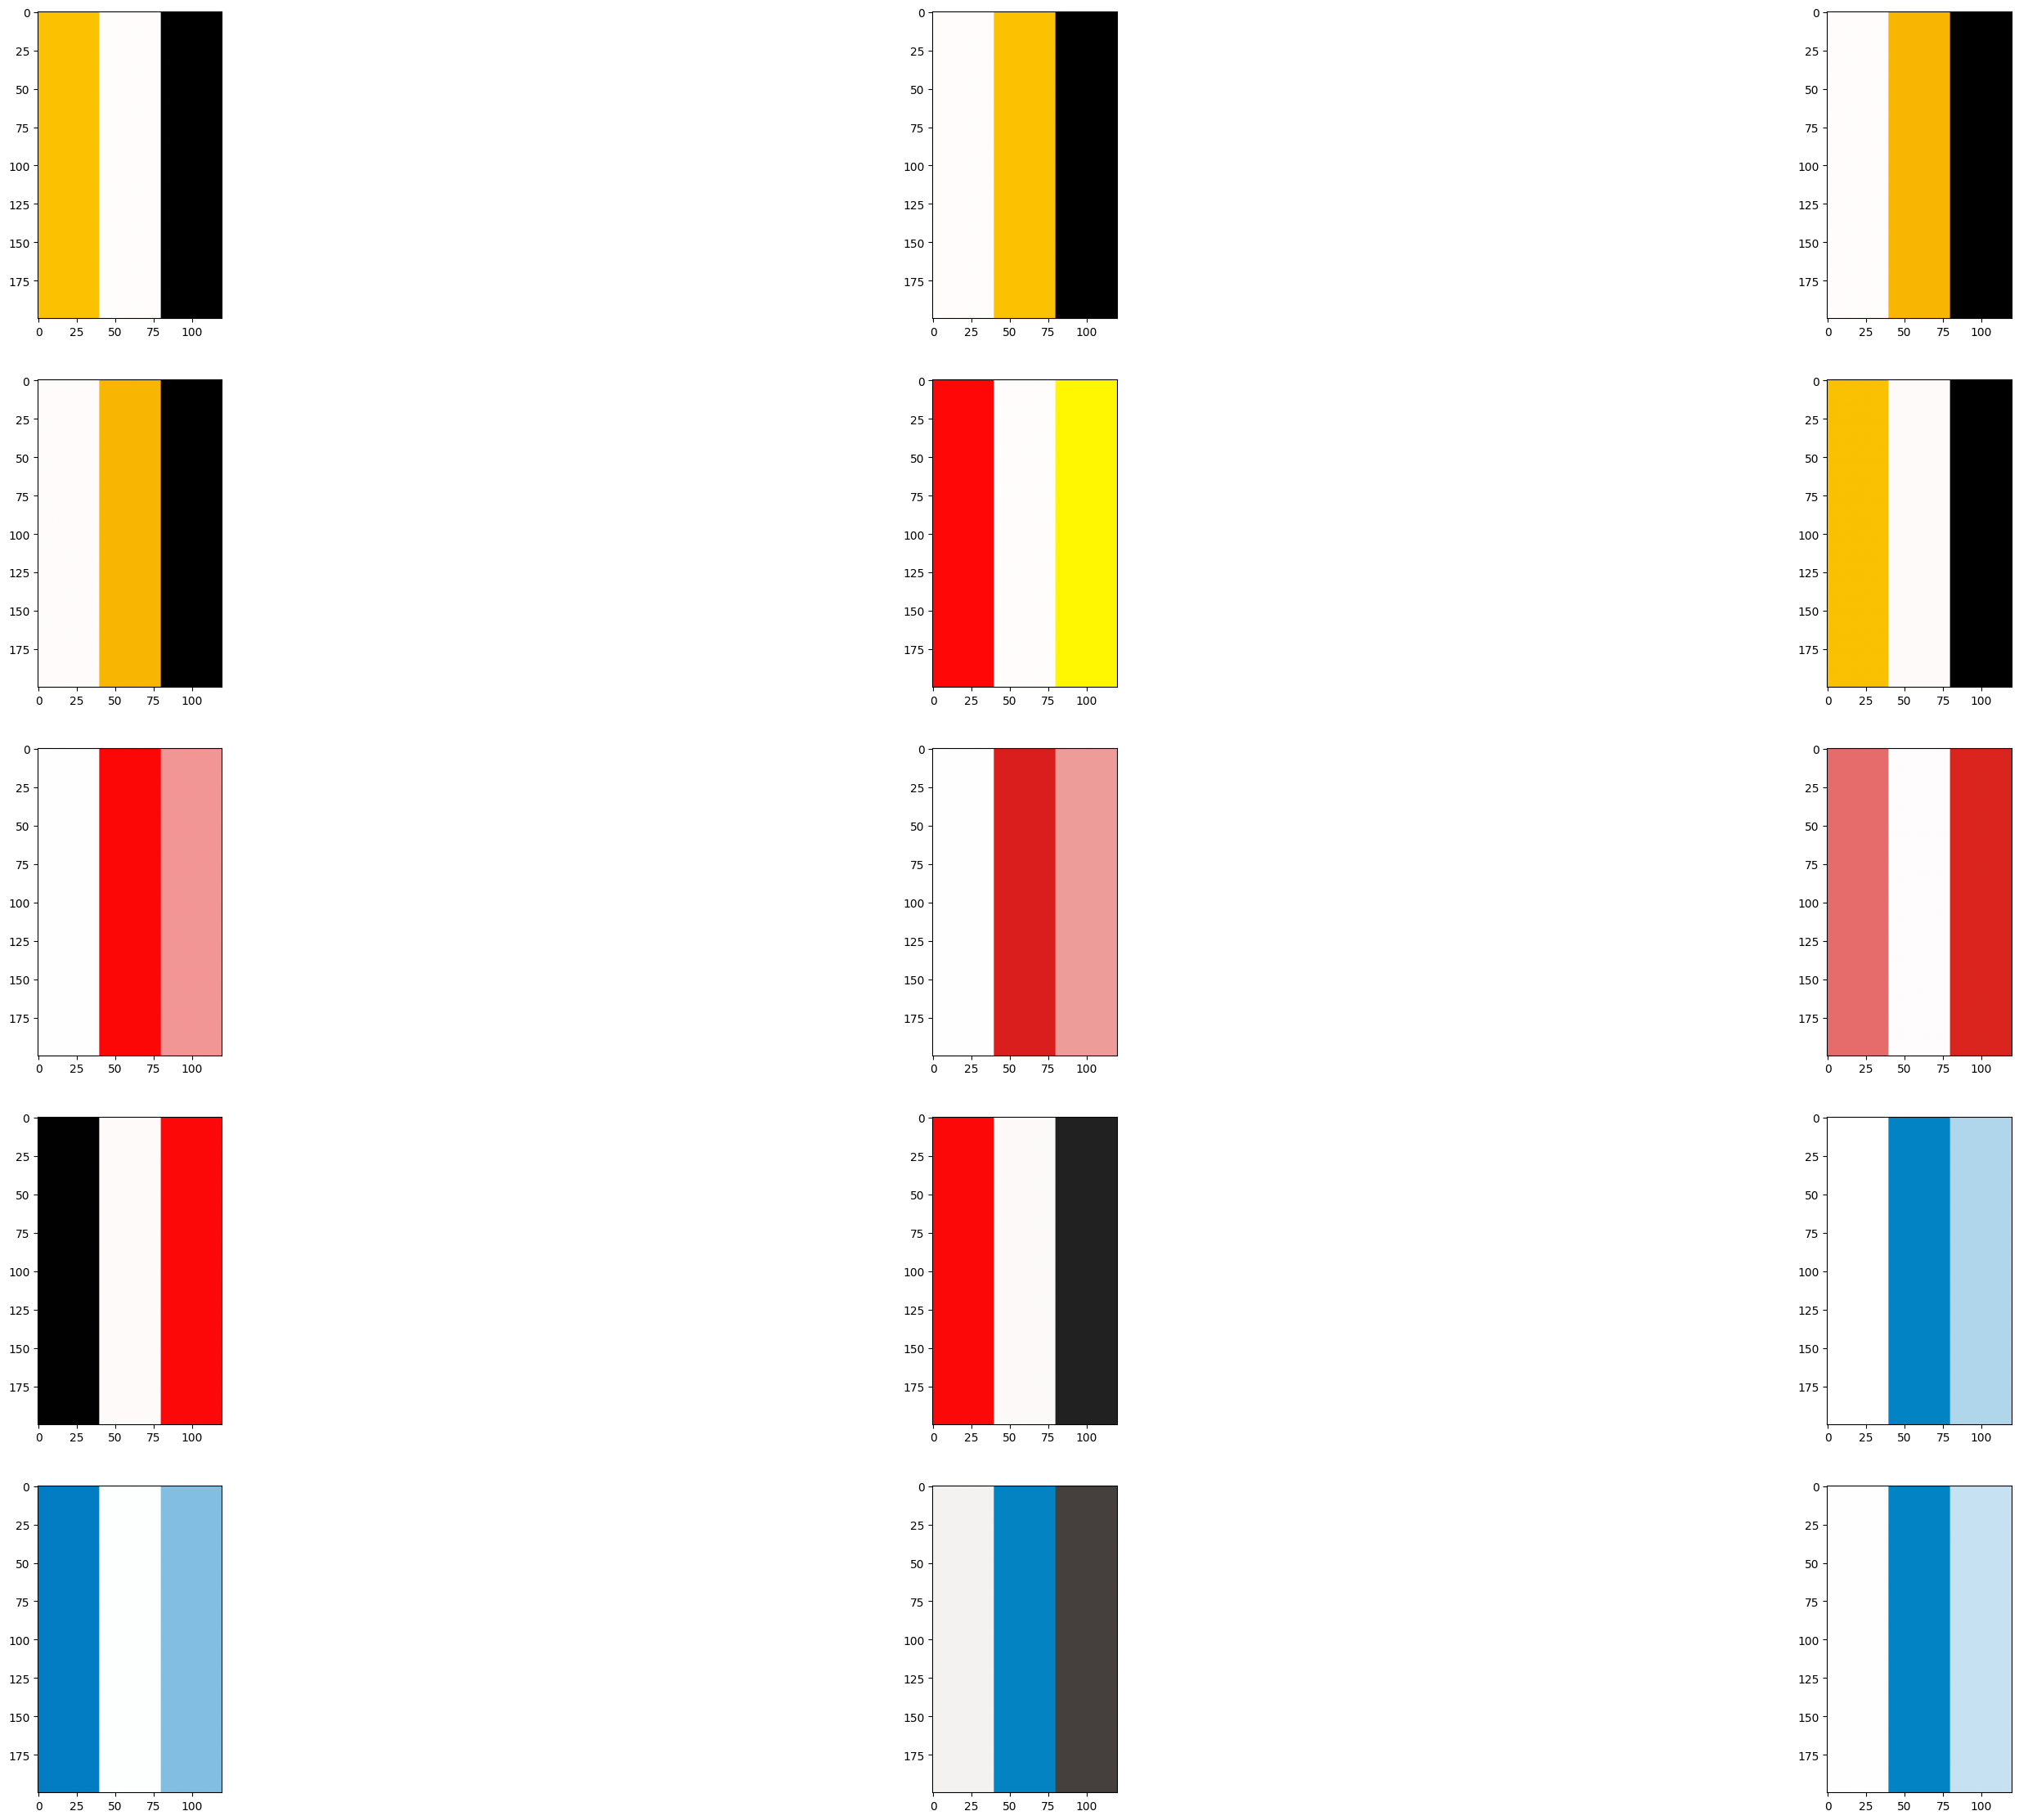

In [96]:
printSigns(image_list_col, False)